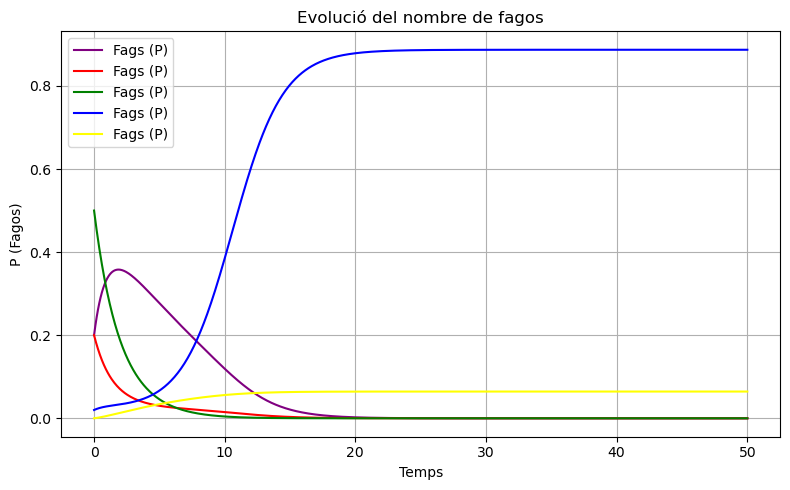

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Paràmetres
rho1 = 0.1
rho2 = 0.5
rho3 = 0.5
rho4 = 0.7

alpha1 = 0.5
alpha2 = 0.5
alpha3 = 0.1
delta2 = 0.5

beta1 = 0.5
beta2 = 0.5
beta3 = 0.1
gamma = 0.5
nu = 0.05

CC = 0.887
A = 1
burstsize = 0.8

# Sistema diferencial amb fagos
def system(t, y):
    B1, B2, B3, B4, P = y  # Bacteris + fags
    BA = B1 + B2 + B3 + B4

    dB1 = rho1 * B1 * (1 - BA / CC) - alpha1 * A * B1 - beta1 * P * B1
    dB2 = rho3 * B2 * (1 - BA / CC) + beta1 * P * B1 - alpha2 * A * B2 + beta2 * P * B3 - gamma * (P / (1 + P)) * B2 - alpha3 * A * B2
    dB3 = rho2 * B3 * (1 - BA / CC) + alpha1 * A * B1 + alpha2 * A * B2 - beta2 * P * B3 - beta3 * P * B3 - delta2 * A * B3
    dB4 = rho4 * B4 * (1 - BA / CC) + alpha3 * A * B2 + beta3 * P * B3 - nu *((P + A) / (1 + P + A))* B3

    dP = burstsize * (gamma * (P / (1 + P)) * B2 + nu * ((P + A) / (1 + P + A)) * B3)  # Producció de fagos

    return [dB1, dB2, dB3, dB4, dP]

# Condicions inicials
y0 = [0.5, 0.2, 0.2, 0.02, 0]  # Inicialment pocs fagos

# Temps
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Integració
sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-14, atol=1e-12)

# Plot fagos
plt.figure(figsize=(8, 5))
plt.plot(sol.t, sol.y[2], label='Fags (P)', color='purple')
plt.plot(sol.t, sol.y[1], label='Fags (P)', color='red')
plt.plot(sol.t, sol.y[0], label='Fags (P)', color='green')
plt.plot(sol.t, sol.y[3], label='Fags (P)', color='blue')
plt.plot(sol.t, sol.y[4], label='Fags (P)', color='yellow')
plt.xlabel('Temps')
plt.ylabel('P (Fagos)')
plt.title('Evolució del nombre de fagos')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


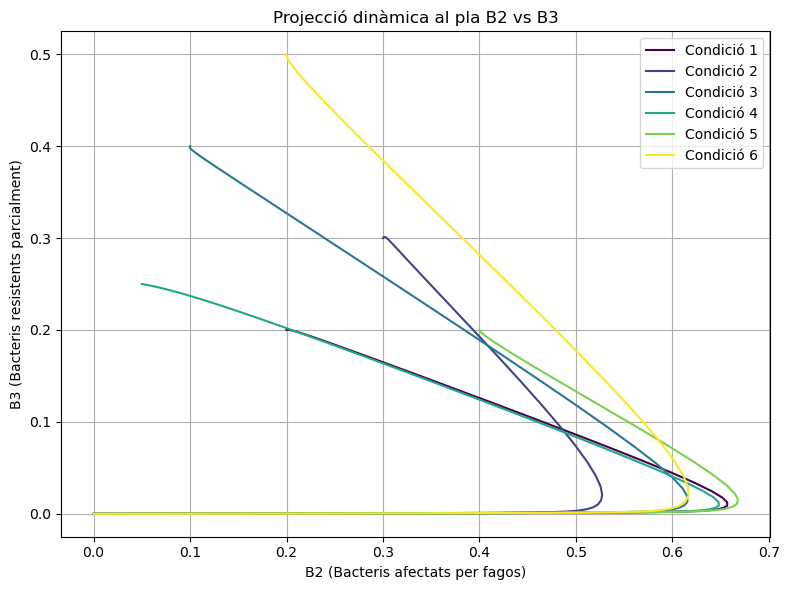

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants i paràmetres
eps = 1e-3
rho1, rho2, rho3, rho4 = 0.1, 0.5, 0.5, 0.7
alpha1, alpha2, alpha3, delta2 = 0.5, 0.5, 0.1, 0.5
beta1, beta2, beta3, gamma, nu = 0.5, 0.5, 0.1, 0.5, 0.6
CC = 0.887
A = 0.1
burstsize = 100

# Sistema diferencial
def system(t, y):
    B1, B2, B3, B4, P = y
    BA = B1 + B2 + B3 + B4

    dB1 = rho1 * B1 * (1 - BA / CC) - alpha1 * A * B1 - beta1 * P * B1
    dB2 = rho3 * B2 * (1 - BA / CC) + beta1 * P * B1 - alpha2 * A * B2 + beta2 * P * B3 - gamma * (P / (1 + P)) * B2 - alpha3 * A * B2
    dB3 = rho2 * B3 * (1 - BA / CC) + alpha1 * A * B1 + alpha2 * A * B2 - beta2 * P * B3 - beta3 * P * B3 - delta2 * A * B3
    dB4 = rho4 * B4 * (1 - BA / CC) + alpha3 * A * B2 + beta3 * P * B3 - nu * eps * (P / (1 + P)) * (A / (1 + A)) * B3

    dP = burstsize * (gamma * (P / (1 + P)) * B2 + nu * eps * (P / (1 + P)) * (A / (1 + A)) * B3)
    
    return [dB1, dB2, dB3, dB4, dP]

# Paràmetres d’integració
t_span = (0, 100)
t_eval = np.linspace(*t_span, 2000)

# Diverses condicions inicials per explorar varietats invariants
initial_conditions = [
    [0.5, 0.2, 0.2, 0.02, 0.1],
    [0.1, 0.3, 0.3, 0.02, 0.05],
    [0.4, 0.1, 0.4, 0.02, 0.01],
    [0.6, 0.05, 0.25, 0.01, 0.2],
    [0.3, 0.4, 0.2, 0.01, 0.15],
    [0.2, 0.2, 0.5, 0.01, 0.05],
]

# Colors per diferenciar
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_conditions)))

# Gràfic
plt.figure(figsize=(8, 6))

for idx, y0 in enumerate(initial_conditions):
    sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-14, atol=1e-12)
    B2 = sol.y[1]
    B3 = sol.y[2]
    plt.plot(B2, B3, label=f'Condició {idx + 1}', color=colors[idx])

plt.xlabel('B2 (Bacteris afectats per fagos)')
plt.ylabel('B3 (Bacteris resistents parcialment)')
plt.title('Projecció dinàmica al pla B2 vs B3')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


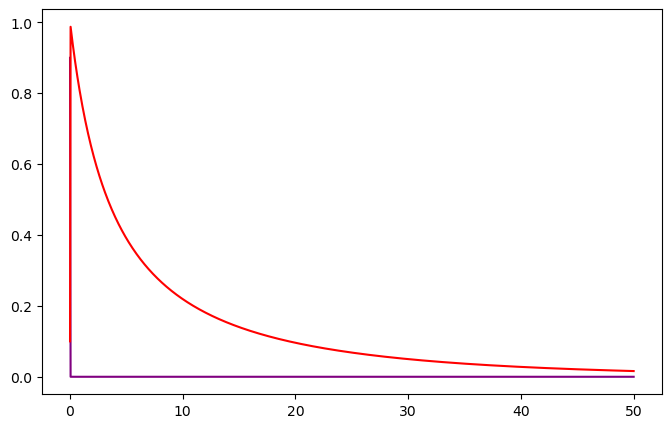

In [105]:
rho1 = 0.1       # Growth rate of B^A
rho2 = 0.2       # Growth rate of B_A
alpha1 = 0.2     # Conversion rate of B^A to B_A
delta2 = 0.25    # Delta parameter
CC = 0.887       # Carrying capacity
A = 1000          # Antibiotic concentration

# Define the system of ODEs
def system(t, y):
    BA = y[0] + y[1]  # Total bacterial population
    
    dB_A_res = rho1 * y[0] * (1 - BA / CC) - alpha1 * A * y[0]
    dB_A_ses = rho2 * y[1] * (1 - BA / CC) + alpha1 * A * y[0] - delta2 * (A / (1 + A)) * y[1]

    return [dB_A_res, dB_A_ses]

# Condicions inicials
y0 = [0.9, 0.1]  # Inicialment pocs fagos

# Temps
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Integració
sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-14, atol=1e-12)

# Plot fagos
plt.figure(figsize=(8, 5))
plt.plot(sol.t, sol.y[0], label='Fags (P)', color='purple')
plt.plot(sol.t, sol.y[1], label='Fags (P)', color='red')


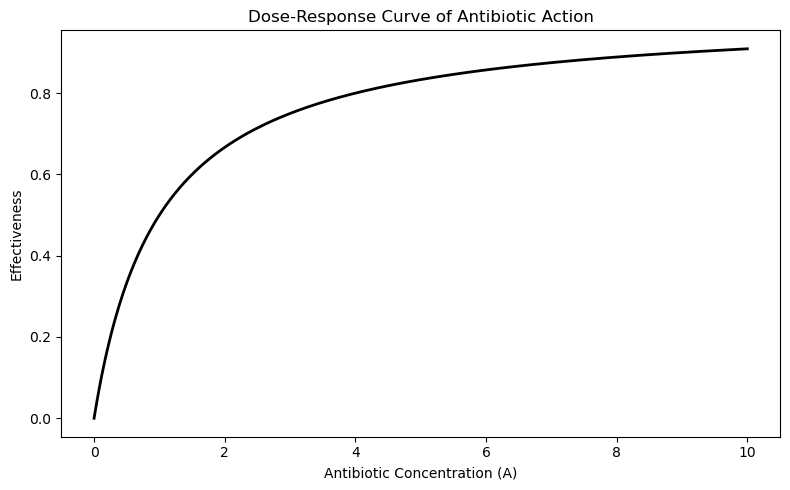

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Hill-type dose-response function
def dose_response(A):
    return A / (1 + A)

# Create a range of antibiotic concentrations
A_values = np.linspace(0, 10, 500)  # from 0 to 10 (arbitrary units)
response = dose_response(A_values)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(A_values, response, linewidth=2, color='black')
plt.title('Dose-Response Curve of Antibiotic Action')
plt.xlabel('Antibiotic Concentration (A)')
plt.ylabel('Effectiveness')

plt.tight_layout()
plt.savefig('curve_dose.pdf')
plt.show()


[-0.38156473 -0.00413273]
[-0.37996088 -0.00571947]
[-0.37835537 -0.00730209]
[-0.37674809 -0.00888077]
[-0.37513897 -0.01045569]
[-0.3735279  -0.01202703]
[-0.37191478 -0.01359498]
[-0.3702995  -0.01515971]
[-0.36868197 -0.01672141]
[-0.36706208 -0.01828027]
[-0.3654397  -0.01983647]
[-0.36381472 -0.02139022]
[-0.36218702 -0.0229417 ]
[-0.36055647 -0.02449112]
[-0.35892295 -0.02603868]
[-0.35728632 -0.02758458]
[-0.35564643 -0.02912903]
[-0.35400315 -0.03067225]
[-0.35235632 -0.03221445]
[-0.35070578 -0.03375585]
[-0.34905138 -0.03529669]
[-0.34739295 -0.0368372 ]
[-0.34573031 -0.03837761]
[-0.34406327 -0.03991817]
[-0.34239165 -0.04145913]
[-0.34071525 -0.04300075]
[-0.33903386 -0.04454329]
[-0.33734727 -0.04608704]
[-0.33565524 -0.04763227]
[-0.33395756 -0.04917927]
[-0.33225396 -0.05072835]
[-0.33054419 -0.05227983]
[-0.32882799 -0.05383401]
[-0.32710506 -0.05539125]
[-0.32537511 -0.05695189]
[-0.32363783 -0.05851629]
[-0.32189288 -0.06008484]
[-0.32013993 -0.06165793]
[-0.31837861

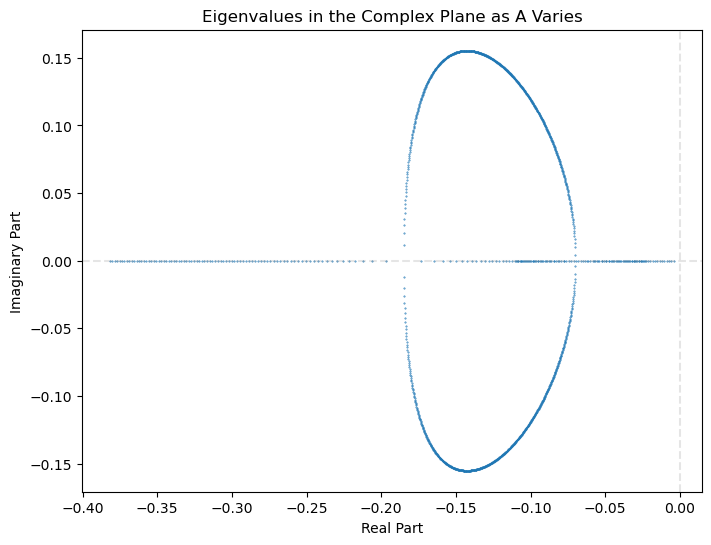

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rho1 = 0.6
rho2 = 0.1
alpha1 = 0.2
delta2 = 0.3
CC = 180

# Function to compute equilibrium and eigenvalues
def compute_eigenvalues(A):
    S = CC * (1 - (alpha1 * A / rho1))
    numerator = alpha1 * A * S
    denominator = delta2 * (A / (1 + A)) + alpha1 * A * (1 - (rho2 / rho1))
    x2 = numerator / denominator
    x1 = S - x2

    # Jacobian matrix at equilibrium (x1 = B_sup_A, x2 = B_sub_A)
    Jx = np.array([
        [rho1 - (2 * rho1 / CC) * x1 - (rho1 / CC) * x2 - alpha1 * A, -(rho1 / CC) * x1],
        [alpha1 * A - (rho2 / CC) * x2, rho2 - (2 * rho2 / CC) * x2 - (rho2 / CC) * x1 - delta2 * (A / (1 + A))]
    ])

    eigenvals = np.linalg.eigvals(Jx)
    return eigenvals

# Range of A values
A_values = np.linspace(0.01, 2.9, 750)
eigen_real = []
eigen_imag = []

for A in A_values:
    eigs = compute_eigenvalues(A)
    print(eigs)
    for eig in eigs:
        eigen_real.append(eig.real)
        eigen_imag.append(eig.imag)

# Plot eigenvalues in the complex plane
plt.figure(figsize=(8, 6))
plt.plot(eigen_real, eigen_imag, 'o', alpha=1, markersize=0.4)
plt.axhline(0, color='gray', linestyle='--', alpha=0.2)
plt.axvline(0, color='gray', linestyle='--', alpha=0.2)
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("Eigenvalues in the Complex Plane as A Varies")

plt.show()



In [205]:
rho1 = 0.3       # Growth rate of B^A
rho2 = 0.2       # Growth rate of B_A
alpha1 = 0.3     # Conversion rate of B^A to B_A
delta2 = 0.25    # Delta parameter
print(rho1/alpha1)
print(rho2/(delta2-rho2))
print((rho1*delta2)/(alpha1*rho2)-1)

1.0
4.000000000000001
0.25


[-0.00129888 -0.22186593]
[-0.00142022 -0.2215657 ]
[-0.00154093 -0.22126569]
[-0.00166102 -0.22096589]
[-0.00178048 -0.22066632]
[-0.00189931 -0.22036697]
[-0.00201753 -0.22006784]
[-0.00213512 -0.21976893]
[-0.00225209 -0.21947024]
[-0.00236844 -0.21917177]
[-0.00248418 -0.21887352]
[-0.0025993  -0.21857549]
[-0.0027138  -0.21827768]
[-0.00282769 -0.21798009]
[-0.00294096 -0.21768273]
[-0.00305363 -0.21738558]
[-0.00316568 -0.21708866]
[-0.00327713 -0.21679196]
[-0.00338796 -0.21649549]
[-0.00349819 -0.21619923]
[-0.00360782 -0.2159032 ]
[-0.00371683 -0.21560739]
[-0.00382525 -0.21531181]
[-0.00393306 -0.21501645]
[-0.00404027 -0.21472131]
[-0.00414688 -0.21442639]
[-0.00425289 -0.2141317 ]
[-0.00435831 -0.21383724]
[-0.00446312 -0.21354299]
[-0.00456734 -0.21324898]
[-0.00467097 -0.21295518]
[-0.004774   -0.21266161]
[-0.00487644 -0.21236827]
[-0.00497829 -0.21207515]
[-0.00507954 -0.21178226]
[-0.00518021 -0.2114896 ]
[-0.00528029 -0.21119716]
[-0.00537978 -0.21090494]
[-0.00547869

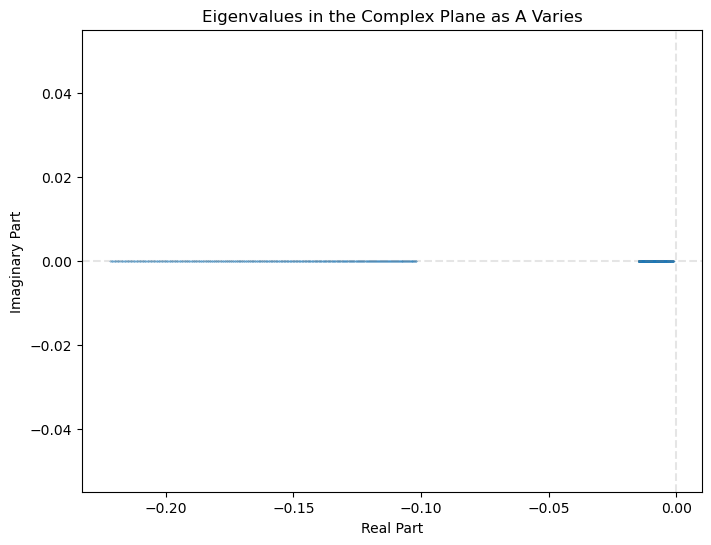

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rho1 = 0.3
rho2 = 0.2
alpha1 = 0.3
delta2 = 0.3
CC = 180

# Function to compute equilibrium and eigenvalues
def compute_eigenvalues(A):
    S = CC * (1 - (alpha1 * A / rho1))
    numerator = alpha1 * A * S
    denominator = delta2 * (A / (1 + A)) + alpha1 * A * (1 - (rho2 / rho1))
    x2 = numerator / denominator
    x1 = S - x2

    # Jacobian matrix at equilibrium (x1 = B_sup_A, x2 = B_sub_A)
    Jx = np.array([
        [rho1 - (2 * rho1 / CC) * x1 - (rho1 / CC) * x2 - alpha1 * A, -(rho1 / CC) * x1],
        [alpha1 * A - (rho2 / CC) * x2, rho2 - (2 * rho2 / CC) * x2 - (rho2 / CC) * x1 - delta2 * (A / (1 + A))]
    ])

    eigenvals = np.linalg.eigvals(Jx)
    return eigenvals

# Range of A values
A_values = np.linspace(0.01, 0.49, 500)
eigen_real = []
eigen_imag = []

for A in A_values:
    eigs = compute_eigenvalues(A)
    print(eigs)
    for eig in eigs:
        eigen_real.append(eig.real)
        eigen_imag.append(eig.imag)

# Plot eigenvalues in the complex plane
plt.figure(figsize=(8, 6))
plt.plot(eigen_real, eigen_imag, 'o', alpha=1, markersize=0.2)
plt.axhline(0, color='gray', linestyle='--', alpha=0.2)
plt.axvline(0, color='gray', linestyle='--', alpha=0.2)
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("Eigenvalues in the Complex Plane as A Varies")

plt.show()

-0.30287273707923623 0.01
-0.0036470690063736297 0.01
-0.30159820901479717 0.012643524699599467
-0.004608365413790814 0.012643524699599467
-0.30032339320155166 0.015287049399198931
-0.005568615166211924 0.015287049399198931
-0.2990482386825244 0.017930574098798398
-0.0065278876589583545 0.017930574098798398
-0.2977726932186502 0.020574098798397864
-0.007486253337490953 0.020574098798397864
-0.29649670323738464 0.02321762349799733
-0.008443783752055383 0.02321762349799733
-0.2952202137787129 0.025861148197596794
-0.009400551614878008 0.025861148197596794
-0.29394316843839197 0.028504672897196263
-0.010356630860074956 0.028504672897196263
-0.2926655093082565 0.031148197596795726
-0.011312096706449278 0.031148197596795726
-0.29138717691339744 0.033791722296395196
-0.01226702572336396 0.033791722296395196
-0.2901081101460157 0.03643524699599466
-0.013221495899892476 0.03643524699599466
-0.288828246195733 0.03907877169559413
-0.014175586717464602 0.03907877169559413
-0.28754752047612536 0.0

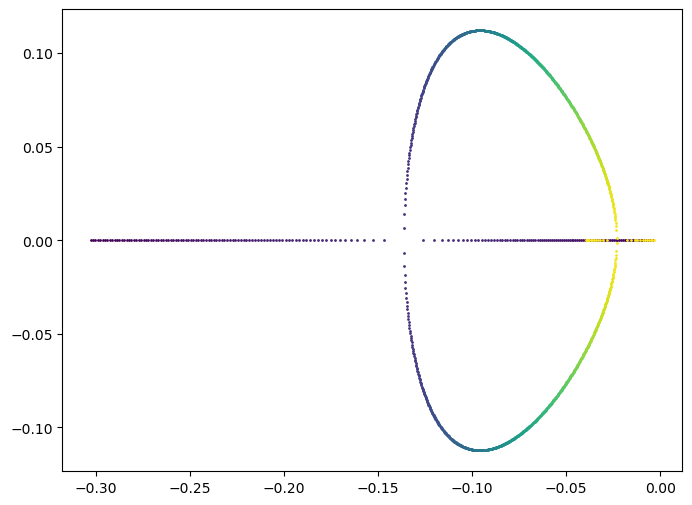

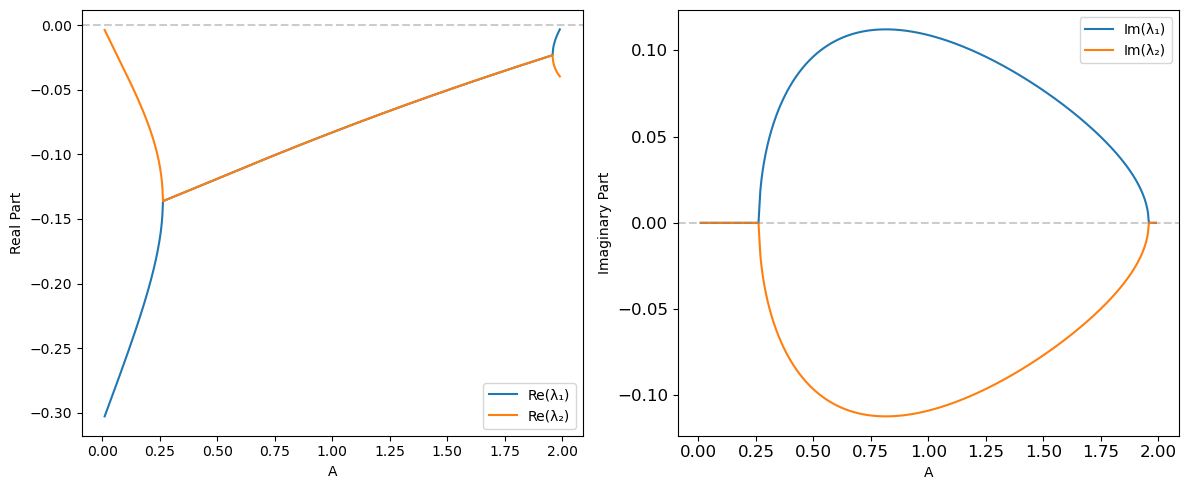

In [7]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rho1 = 0.6
rho2 = 0.125
alpha1 = 0.3
delta2 = 0.25
CC = 0.887
A_values = np.linspace(0.01, 1.99, 750)
colors = cm.viridis(np.linspace(0, 1, len(A_values)))

def compute_eigenvalues(A):
    S = CC * (1 - (alpha1 * A / rho1))
    numerator = alpha1 * A * S
    denominator = delta2 * (A / (1 + A)) + alpha1 * A * (1 - (rho2 / rho1))
    x2 = numerator / denominator
    x1 = S - x2
    #print(x1,x2)

    # Jacobian matrix at equilibrium (x1 = B_sup_A, x2 = B_sub_A)
    Jx = np.array([
        [rho1 - (2 * rho1 / CC) * x1 - (rho1 / CC) * x2 - alpha1 * A, -(rho1 / CC) * x1],
        [alpha1 * A - (rho2 / CC) * x2, rho2 - (2 * rho2 / CC) * x2 - (rho2 / CC) * x1 - delta2 * (A / (1 + A))]
    ])

    eigenvals = np.linalg.eigvals(Jx)
    return eigenvals


plt.figure(figsize=(8, 6))

for i, A in enumerate(A_values):
    eigs = compute_eigenvalues(A)
    for eig in eigs:
        plt.plot(eig.real, eig.imag, 'o', color=colors[i], markersize=1)
        print(eig, A)

e1_real, e1_imag = [], []
e2_real, e2_imag = [], []

for A in A_values:
    eigs = compute_eigenvalues(A)
    e1_real.append(eigs[0].real)
    e1_imag.append(eigs[0].imag)
    e2_real.append(eigs[1].real)
    e2_imag.append(eigs[1].imag)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(A_values, e1_real, label='Re(λ₁)')
plt.plot(A_values, e2_real, label='Re(λ₂)')
plt.axhline(0, color='gray', linestyle='--', alpha=0.4)

plt.xlabel("A", fontsize=10)
plt.ylabel("Real Part", fontsize=10)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(A_values, e1_imag, label='Im(λ₁)')
plt.plot(A_values, e2_imag, label='Im(λ₂)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(0, color='gray', linestyle='--', alpha=0.4)

plt.xlabel("A")
plt.ylabel("Imaginary Part")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
#plt.savefig('imaginary_real_onefocus.pdf')
plt.show()


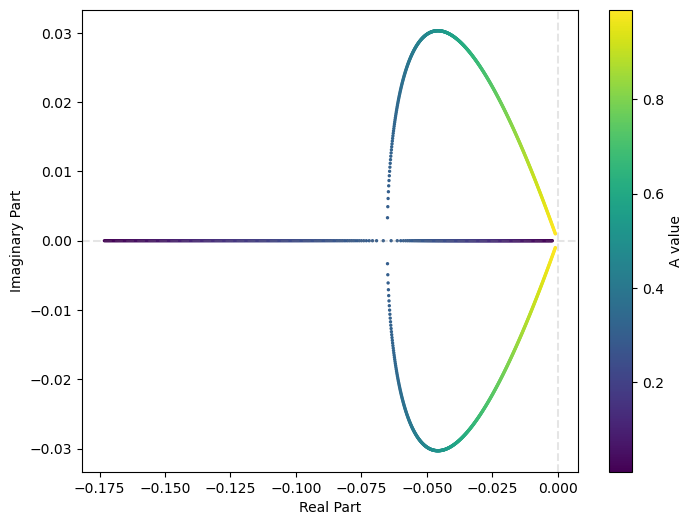

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Parameters
rho1 = 0.3
rho2 = 0.125
alpha1 = 0.3
delta2 = 0.25
CC = 0.887
A_values = np.linspace(0.01, 0.99, 750)

# Colormap setup
cmap = cm.viridis
norm = mcolors.Normalize(vmin=A_values.min(), vmax=A_values.max())

# Collect eigenvalue data
eigen_real = []
eigen_imag = []
color_vals = []

def compute_eigenvalues(A):
    S = CC * (1 - (alpha1 * A / rho1))
    numerator = alpha1 * A * S
    denominator = delta2 * (A / (1 + A)) + alpha1 * A * (1 - (rho2 / rho1))
    x2 = numerator / denominator
    x1 = S - x2

    Jx = np.array([
        [rho1 - (2 * rho1 / CC) * x1 - (rho1 / CC) * x2 - alpha1 * A, -(rho1 / CC) * x1],
        [alpha1 * A - (rho2 / CC) * x2, rho2 - (2 * rho2 / CC) * x2 - (rho2 / CC) * x1 - delta2 * (A / (1 + A))]
    ])

    return np.linalg.eigvals(Jx)

# Collect all eigenvalues and colors
for i, A in enumerate(A_values):
    eigs = compute_eigenvalues(A)
    for eig in eigs:
        eigen_real.append(eig.real)
        eigen_imag.append(eig.imag)
        color_vals.append(A)

# Plot using scatter
plt.figure(figsize=(8, 6))
sc = plt.scatter(eigen_real, eigen_imag, c=color_vals, cmap=cmap, norm=norm, s=2)

plt.axhline(0, color='gray', linestyle='--', alpha=0.2)
plt.axvline(0, color='gray', linestyle='--', alpha=0.2)
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")


# Add colorbar linked to scatter
cbar = plt.colorbar(sc)
cbar.set_label("A value")
plt.savefig('colormap_A_onefocus.pdf')
plt.show()

